# Spaceship Titanic Competiton

## 1.Imports

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## 2.Loading the Dataset

In [2]:
# Load a dataset into a Pandas Dataframe
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv("./dataset/test.csv")

In [3]:
print("Full train dataset shape is {}".format(train_data.shape))
print("Full test dataset shape is {}".format(test_data.shape))

Full train dataset shape is (8693, 14)
Full test dataset shape is (4277, 13)


## 3.Basic EDA

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Getting basic information about the dataset
print("Number of rows and columns:")
print(train_data.shape)

print("\nColumn names:")
print(train_data.columns)

Number of rows and columns:
(8693, 14)

Column names:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [6]:
# Getting summary statistics of the numerical columns
print("\nSummary statistics of numerical columns:")
print(train_data.describe())


Summary statistics of numerical columns:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [7]:
# Counting the number of missing values in each column
print("\nNumber of missing values in each column:")
print(train_data.isnull().sum().sort_values(ascending=False))


Number of missing values in each column:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


In [8]:
# Checking the data types of each column
print("\nData types of each column:")
print(train_data.dtypes)


Data types of each column:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


### bar graph

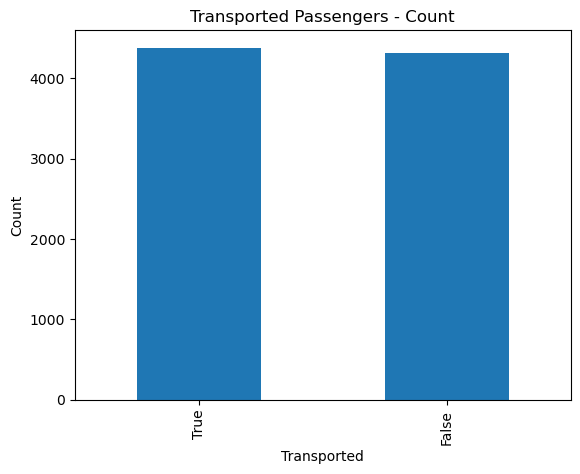

In [9]:
# Getting the counts of 'Transported' variable
plot_df = train_data['Transported'].value_counts()

# Creating the bar plot
plot_df.plot(kind="bar")

# Adding labels and title
plt.xlabel("Transported")
plt.ylabel("Count")
plt.title("Transported Passengers - Count")

# Display the plot
plt.show()

### subplots of numerical data


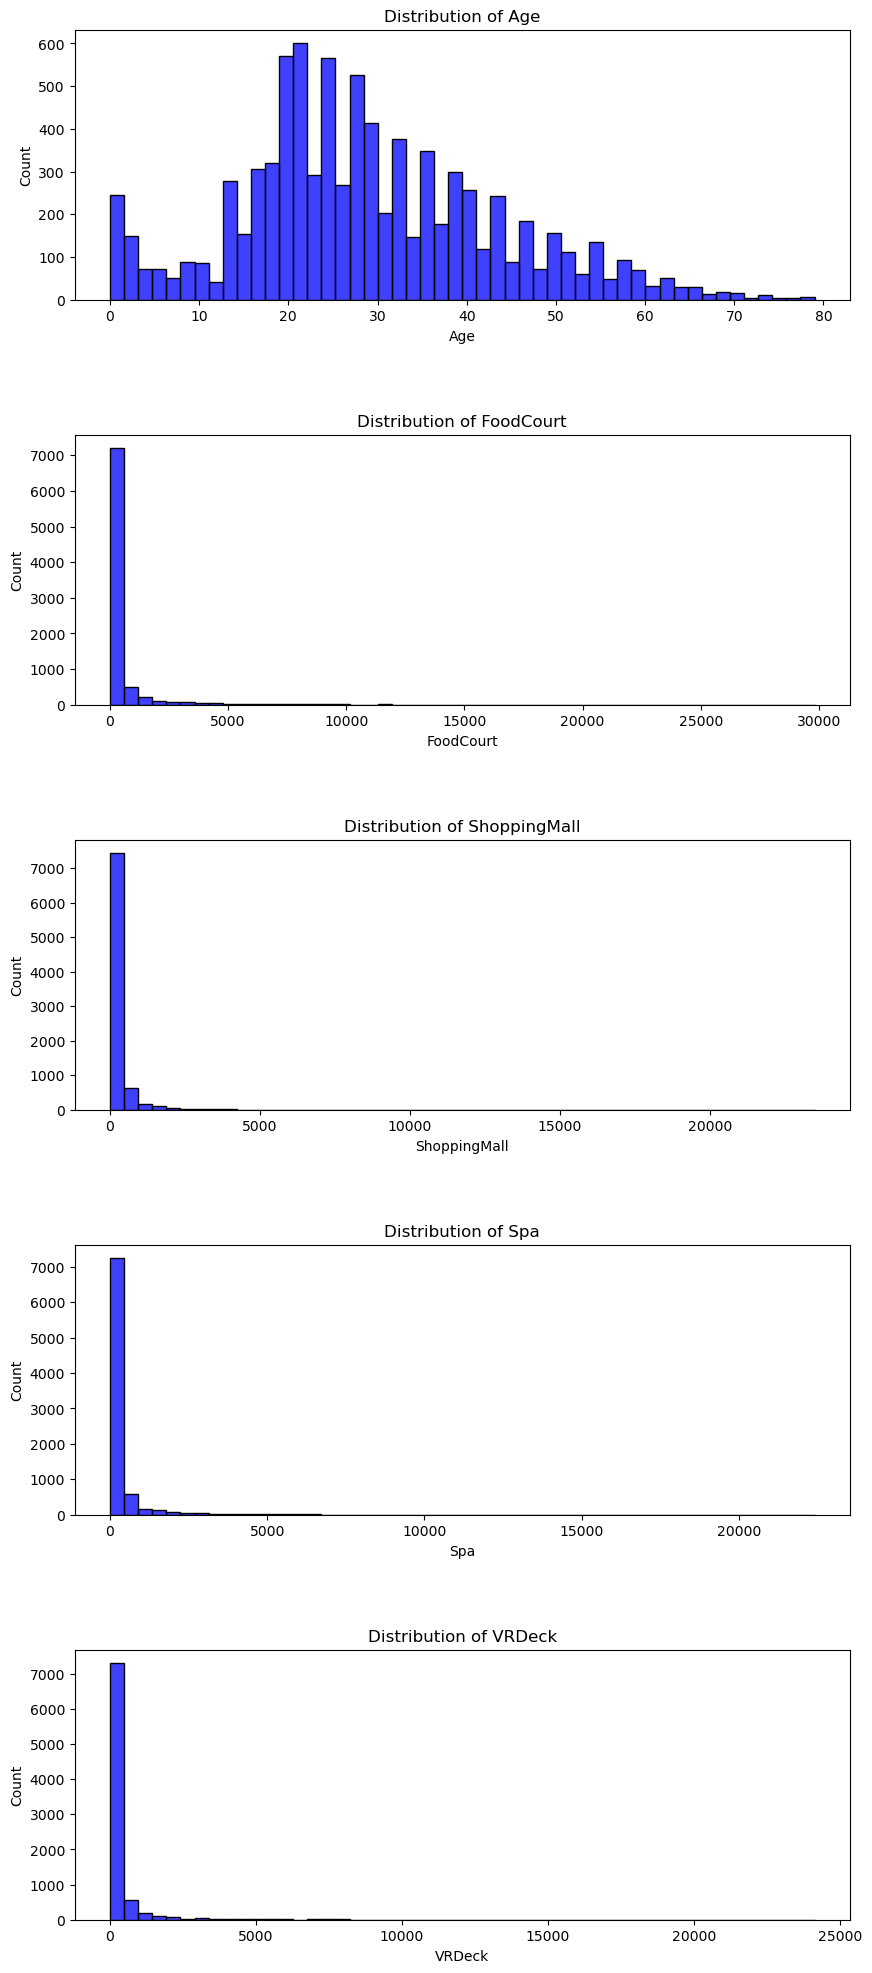

In [10]:
# Creating a 5-row subplot with histograms
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(top=2)

# Plotting histograms for each column
sns.histplot(train_data['Age'], color='b', bins=50, ax=ax[0])
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")
ax[0].set_title("Distribution of Age")

sns.histplot(train_data['FoodCourt'], color='b', bins=50, ax=ax[1])
ax[1].set_xlabel("FoodCourt")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of FoodCourt")

sns.histplot(train_data['ShoppingMall'], color='b', bins=50, ax=ax[2])
ax[2].set_xlabel("ShoppingMall")
ax[2].set_ylabel("Count")
ax[2].set_title("Distribution of ShoppingMall")

sns.histplot(train_data['Spa'], color='b', bins=50, ax=ax[3])
ax[3].set_xlabel("Spa")
ax[3].set_ylabel("Count")
ax[3].set_title("Distribution of Spa")

sns.histplot(train_data['VRDeck'], color='b', bins=50, ax=ax[4])
ax[4].set_xlabel("VRDeck")
ax[4].set_ylabel("Count")
ax[4].set_title("Distribution of VRDeck")

# Adjusting space between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

In [11]:
# Perform correlation analysis
correlation_matrix = train_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000  


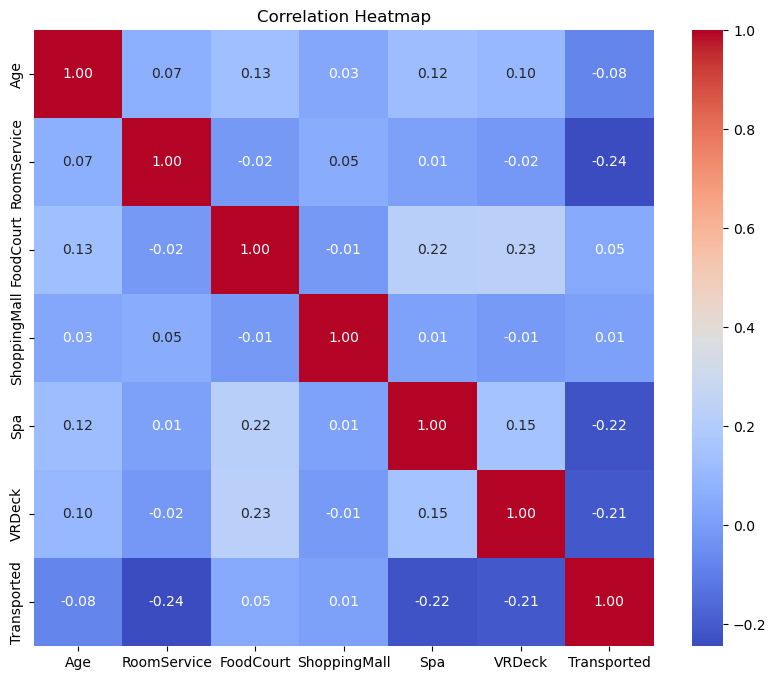

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 4.Preparing Dataset

### 4.1. Data Cleaning

In [13]:
# Fill missing values with the median for numerical columns
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Convert categorical variable 'VIP' to numerical (1 for True, 0 for False)
train_data['VIP'] = train_data['VIP'].astype(int)

# Convert 'CryoSleep' to integer (assuming it contains numerical values in string format)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

# Convert 'Transported' to integers (True=1, False=0)
train_data['Transported'] = train_data['Transported'].astype(int)


### 4.2. Feature Engineering

In [14]:
# Split 'Cabin' column into 'Deck', 'Cabin_num', and 'Side' columns
train_data[['Deck', 'Cabin_num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)

# Drop irrelevant columns (e.g., 'PassengerId', 'Name','Cabin')
try:
    train_data.drop(['PassengerId', 'Name','Cabin'], axis=1, inplace=True)
except:
    print("Field does not exist")

In [15]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [16]:
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Deck            199
Cabin_num       199
Side            199
Destination     182
RoomService     181
CryoSleep         0
Age               0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

### 4.3 Splitting the Dataset

In [17]:
def split_dataset(train_data, test_ratio=0.20):
    test_indices = np.random.rand(len(train_data)) < test_ratio
    return train_data[~test_indices], train_data[test_indices]

In [18]:
train_data, valid_data = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(len(train_data), len(valid_data)))

6927 examples in training, 1766 examples in testing.


In [19]:
# Convert the pandas DataFrames to TensorFlow datasets
label = "Transported"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_data, label=label)

## 5. Training the Model
### I have chosen **Random Forest**

In [20]:
# Creating the Random Forest model with the specified configuration
rf = tfdf.keras.RandomForestModel()

Use /tmp/tmpg7dxreag as temporary training directory


In [21]:
rf.compile(metrics=["accuracy"])

In [22]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.678481. Found 6927 examples.
Training model...


[INFO 23-07-20 21:50:04.8850 UTC kernel.cc:1243] Loading model from path /tmp/tmpg7dxreag/model/ with prefix 909db84cb131445c


Model trained in 0:00:58.599047
Compiling model...


[INFO 23-07-20 21:50:05.8733 UTC decision_forest.cc:660] Model loaded with 300 root(s), 232104 node(s), and 13 input feature(s).
[INFO 23-07-20 21:50:05.8733 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-07-20 21:50:05.8734 UTC kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## 6.Evaluation/Validation(OOB)

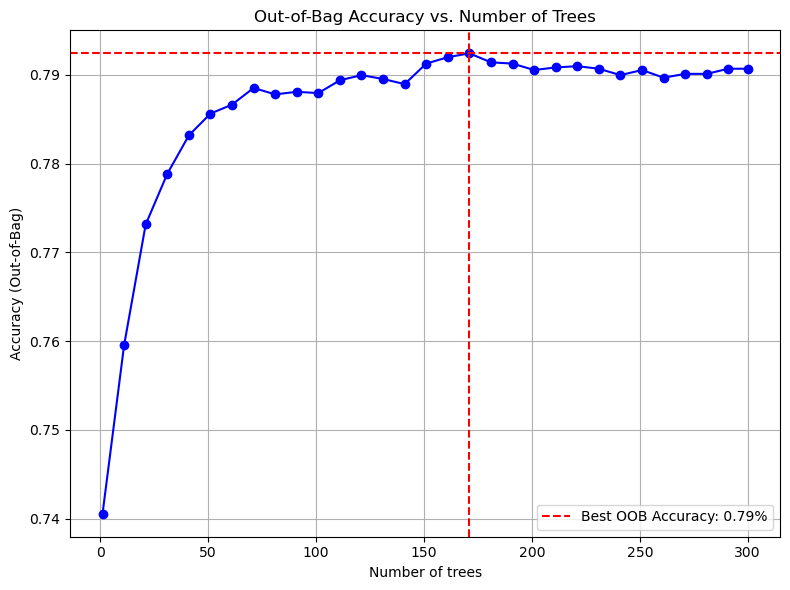

In [23]:
# Access the training logs to get the number of trees and OOB accuracy during training
logs = rf.make_inspector().training_logs()

# Extract the number of trees and OOB accuracy from the logs
num_trees = [log.num_trees for log in logs]
oob_accuracy = [log.evaluation.accuracy for log in logs]

# Find the index of the maximum OOB accuracy and the corresponding number of trees
best_accuracy_index = oob_accuracy.index(max(oob_accuracy))
best_accuracy = oob_accuracy[best_accuracy_index]
best_num_trees = num_trees[best_accuracy_index]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(num_trees, oob_accuracy, marker='o', linestyle='-', color='b')
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f"Best OOB Accuracy: {best_accuracy:.2f}%")
plt.axvline(x=best_num_trees, color='r', linestyle='--')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (Out-of-Bag)")
plt.title("Out-of-Bag Accuracy vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Create an inspector to access the model's information
inspector = rf.make_inspector()

# Get evaluation metrics on the validation dataset
evaluation = rf.evaluate(valid_ds, return_dict=True)

# Print evaluation metrics
print("Evaluation Metrics:")
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

# Print additional model information
print("\nModel Information:")
print(f"Number of trees in the Random Forest: {inspector.num_trees()}")

2/2 [==============================] - 1s 67ms/step - loss: 0.0000e+00 - accuracy: 0.7990
Evaluation Metrics:
loss: 0.0000
accuracy: 0.7990

Model Information:
Number of trees in the Random Forest: 300


In [26]:
# Get the variable importances
variable_importances = inspector.variable_importances()# Print available variable importances
print("Available Variable Importances:")
for importance in variable_importances.keys():
    print(f"\t{importance}")

Available Variable Importances:
	SUM_SCORE
	NUM_AS_ROOT
	INV_MEAN_MIN_DEPTH
	NUM_NODES


In [27]:
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]

[("Spa" (1; #10), 0.20411717008408473),
 ("CryoSleep" (1; #2), 0.1903381491889023),
 ("RoomService" (1; #7), 0.17736001277658472),
 ("Cabin_num" (4; #1), 0.1527884560119518),
 ("VRDeck" (1; #12), 0.1512813181654234),
 ("FoodCourt" (1; #5), 0.14552616125566653),
 ("ShoppingMall" (1; #8), 0.12369647479734937),
 ("Deck" (4; #3), 0.11789897742148595),
 ("Age" (1; #0), 0.11302307889965828),
 ("HomePlanet" (4; #6), 0.11269254998106133),
 ("Side" (4; #9), 0.09995022248257111),
 ("Destination" (4; #4), 0.09215811787392347),
 ("VIP" (1; #11), 0.08344042874442602)]

In [28]:
inspector.variable_importances()["NUM_NODES"]

[("Cabin_num" (4; #1), 38129.0),
 ("Age" (1; #0), 21363.0),
 ("FoodCourt" (1; #5), 8385.0),
 ("Spa" (1; #10), 8074.0),
 ("VRDeck" (1; #12), 8071.0),
 ("ShoppingMall" (1; #8), 7850.0),
 ("RoomService" (1; #7), 7361.0),
 ("Deck" (4; #3), 5902.0),
 ("Destination" (4; #4), 4136.0),
 ("Side" (4; #9), 3715.0),
 ("HomePlanet" (4; #6), 2149.0),
 ("CryoSleep" (1; #2), 697.0),
 ("VIP" (1; #11), 70.0)]

In [29]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 115.0),
 ("Spa" (1; #10), 69.0),
 ("RoomService" (1; #7), 60.0),
 ("VRDeck" (1; #12), 29.0),
 ("ShoppingMall" (1; #8), 14.0),
 ("FoodCourt" (1; #5), 11.0),
 ("Deck" (4; #3), 1.0),
 ("HomePlanet" (4; #6), 1.0)]

In [30]:
inspector.variable_importances()["SUM_SCORE"]

[("Cabin_num" (4; #1), 257369.25175620307),
 ("CryoSleep" (1; #2), 133096.80898279836),
 ("Spa" (1; #10), 115789.95827861899),
 ("RoomService" (1; #7), 99943.98982133815),
 ("VRDeck" (1; #12), 98925.14326700132),
 ("Deck" (4; #3), 82326.60612247651),
 ("FoodCourt" (1; #5), 76039.98021792469),
 ("Age" (1; #0), 75846.37733762963),
 ("HomePlanet" (4; #6), 52742.84725587984),
 ("ShoppingMall" (1; #8), 51906.372083190945),
 ("Side" (4; #9), 17029.818100297096),
 ("Destination" (4; #4), 15885.08108273003),
 ("VIP" (1; #11), 282.1045443993062)]

## 7.Testing

In [31]:
import pandas as pd
import tensorflow_decision_forests as tfdf

# Load the test dataset
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
passenger_ids = test_data.PassengerId

# Replace NaN values with zero
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num, and Side from the column Cabin and remove Cabin
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_data['VIP'] = test_data['VIP'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

# Get the predictions for test data
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': passenger_ids,
                       'Transported': n_predictions.squeeze()})

output.head()


5/5 [==============================] - 0s 63ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [32]:
sample_submission_data = pd.read_csv('./dataset/sample_submission.csv')
sample_submission_data['Transported'] = n_predictions
sample_submission_data.to_csv('./prediction/metarex21_submission.csv', index=False)
sample_submission_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


## 8. Saving the Model

rf.save('./model')